# Lab 3 - Visualization

Last update: 11/11/2023

- Name: Dương Trường Bình
- Student ID: 21127229

***

## Work and submission guidelines

**Work on your assignment**

- You need to do your assignment directly in this notebook. First, fill out your name and ID at the beginning of the file. In the notebook, fill in places that say:
```python
#TODO
```

- During your work, you can print out the result, create more cells to test, or create more functions to handle things. Please note that <font color=red>you are not allowed to delete or modify my code cells</font> (except in the case that mentioned above). Remember to remove `raise NotImplementedError("not implement")` when running the code.

- Always press `Ctrl + S` in order to save your work.

**Notes:**

    *  Copy means zero
    *  You have to submit your work on time. No exception
    *  Any questions about your grade are based on the assignment submitted on Moodle
    *  Wrong submission takes you -2 points

**Submit your work**

- When grading your assignment, I will choose `Kernel` - `Restart Kernel & Run All Cells` in order to restart the kernel and run all cells in your notebook. Therefore, you should do that before submitting to ensure that the outputs are all as expected.

- After that, rename you notebook with your student ID (e.g. `1234567.ipynb`) and submit on Moodle.

- <font color=red>Please strictly follow the submission rules.</font>

## Abstract and general requirements

**Abstract**

- In this assignment, you are required to visualize data and results. This task is very important since it provides reader (your clients, your boss,...) an overview of the data as well as your results.

- You will visualize the data in order to answer some questions. By answering these questions, you are able to get some insights from data.

- You will also visualize the results of machine learning model to be able to know whether your model works well or not.

**General requirements**

- Every charts **must have their own name, axes name, legends**.
- The charts you draw must not only be correct but also beautiful:
    - The correctness is shown in choosing the right chart and accurately calculating the data to draw the chart.
    - The beauty is expressed in the UI/UX of the chart. The beauty of UI is shown in choosing the colors, layout of the chart. The beauty of UX is reflected in the fact that the reader can easily capture your message conveyed through your notebook.

---

In [1]:
# visialize stuff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import json
# !pip install geopandas
import geopandas

# modeling stuff
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import random

## Data visualization

- In this section, you are going to compute and visualize some information about Covid-19
- The data prepared in `./data` was collected from Worldometer
- Link: https://www.worldometers.info/coronavirus/

In [2]:
# read the data into a dataframe
df = pd.read_csv('./data/data.csv')
print(f'Shape: {df.shape}')

df.head(5)

Shape: (219, 10)


,Country Name,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Critical Cases,Total Tests,Population
0,USA,"31,990,143",NaN,"576,298",NaN,"24,560,856","6,852,989","9,321","420,822,699","332,516,170"
1,India,"13,689,453","+3,380","171,089",NaN,"12,253,697","1,264,667","8,944","259,207,108","1,390,568,032"
2,Brazil,"13,521,409",NaN,"355,031",NaN,"11,957,068","1,209,310","8,318","28,600,000","213,737,070"
3,France,"5,067,216",NaN,"99,135",NaN,"310,934","4,657,147","5,916","70,140,847","65,386,285"
4,Russia,"4,657,883","+8,173","103,601",338.0,"4,281,776","272,506","2,300","124,100,000","145,983,351"


### Requrement #1: Preprocess

- **TODO**: Take a look at the data files, then go to the URL aforementioned, explore the meaning of columns in the dataset and fill in the blanks:
    - Country Name: The name of the country for which the data is being reported
    - Total Cases: The total number of confirmed COVID-19 cases in the country or territory since the beginning of the pandemic.
    - New Cases: The number of new confirmed COVID-19 cases reported in the country in the last 24 hours.
    - Total Deaths: The total number of COVID-19-related deaths reported in the country since the beginning of the pandemic.
    - New Deaths:  The number of new COVID-19-related deaths reported in the country in the last 24 hours.
    - Total Recovered: The total number of people who have recovered from COVID-19 in the country. However, this number is imperfect due to inconsistencies in reporting practices across countries and regions. The definition of "recovered" varies, and some cases may not be accurately reported or tracked.
    - Active Cases: `= (Total Cases) - (Total Deaths) - (Recovered)`.The estimated number of people who are currently infected with COVID-19 in the country
    - Critical Cases: The number of people who are currently hospitalized with COVID-19 and are in a critical or life-threatening condition. Today, it represents for the most part the number of patients currently being treated in Intensive Care Unit (ICU)
    - Total Tests: The total number of COVID-19 tests that have been conducted in the country
    - Population: The current population of the country 

- Check the data with `info()` function

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    object 
 2   New Cases        46 non-null     object 
 3   Total Deaths     219 non-null    object 
 4   New Deaths       32 non-null     float64
 5   Total Recovered  217 non-null    object 
 6   Active Cases     217 non-null    object 
 7   Critical Cases   146 non-null    object 
 8   Total Tests      210 non-null    object 
 9   Population       219 non-null    object 
dtypes: float64(1), object(9)
memory usage: 17.2+ KB


- You can see that `New Cases`, `New Deaths`, `Critical Cases` have a lot of missing data (at least 33.3%). Therefore, we have to remove these columns.
- Most of data in columns are `object` type, which are not suitable at all. They should be converted to integer.
- `Total Recovered`, `Active Cases` and `Total Tests` only have a few missing values, so we can fill in these missing values with median value of each column.

In [4]:
# TODO: drop New Cases, New Deaths, Critical Cases
df = df.drop(columns=['New Cases', 'New Deaths', 'Critical Cases'])
# raise NotImplementedError('not implemented')

# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country Name     219 non-null    object
 1   Total Cases      219 non-null    object
 2   Total Deaths     219 non-null    object
 3   Total Recovered  217 non-null    object
 4   Active Cases     217 non-null    object
 5   Total Tests      210 non-null    object
 6   Population       219 non-null    object
dtypes: object(7)
memory usage: 12.1+ KB


In [5]:
# TODO: convert data to integer. if the converter returns error, leave it a None
numeric_columns = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Tests', 'Population']
def convert(x):
    try:
        return int(x)
    except:
        return None
for column in numeric_columns:
    df[column] = df[column].str.replace(',', '')
    df[column] = df[column].apply(convert)
    
#raise NotImplementedError('not implemented')

# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    int64  
 2   Total Deaths     204 non-null    float64
 3   Total Recovered  217 non-null    float64
 4   Active Cases     217 non-null    float64
 5   Total Tests      210 non-null    float64
 6   Population       219 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 12.1+ KB


**TODO**: We did handle missing value before. Why do we still have missing values here?

We have deleted the columns with a missing value rate greater than 33.3% such as `New Cases`, `New Deaths`, `Critical Cases`, the remaining columns have a missing value rate less than 33.3% so we still keep them. Therefore, there are still missing values in the remaining columns.

In [6]:
# TODO: fill in the missing data with median value
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].median())
#raise NotImplementedError('not implemented')

# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    int64  
 2   Total Deaths     219 non-null    float64
 3   Total Recovered  219 non-null    float64
 4   Active Cases     219 non-null    float64
 5   Total Tests      219 non-null    float64
 6   Population       219 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 12.1+ KB


**TODO**: Why do we have `float64` here?

The `convert()` function, as per the given requirements, will convert data to integers. If conversion is not possible, it will return None. Therefore:

- Columns like `Total Deaths`, `Total Recovered`, `Active Cases`,`Total Tests` contain missing values, making them unable to be converted to integers. Consequently, the function returns None. Subsequently, pandas automatically converts None to NaN, resulting in a column with a dtype of float64, encompassing both integer values and NaN.

- The remaining columns, devoid of missing values, can be successfully converted to integers, resulting in a dtype of int64

In [7]:
# TODO: save your new data frame to `./data/new_data.csv`
df.to_csv('./data/new_data.csv', index=False)
#raise NotImplementedError('not implemented')

In [8]:
# TEST
file = open('./data/new_data.csv', 'r')
new_data = file.read()
file.close()

file = open('./data/correct_data.csv', 'r')
correct_data = file.read()
file.close()

assert new_data == correct_data

### Requirement #2: Visualize single variable

- For now, if you do not pass the test, you have to work on the correct file by un-commenting the cell code below to read the `./data/correct_data.csv` into `df`
- You are going to draw 6 bar charts which show all the fields of dataset. For each bar chart, sort the values of countries in descending order and only visualize 5 countries

In [9]:
# # un-comment these lines of code
# df = pd.read_csv('./data/correct_data.csv')

df.head()

,Country Name,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population
0,USA,31990143,576298.0,24560856.0,6852989.0,420822699.0,332516170
1,India,13689453,171089.0,12253697.0,1264667.0,259207108.0,1390568032
2,Brazil,13521409,355031.0,11957068.0,1209310.0,28600000.0,213737070
3,France,5067216,99135.0,310934.0,4657147.0,70140847.0,65386285
4,Russia,4657883,103601.0,4281776.0,272506.0,124100000.0,145983351


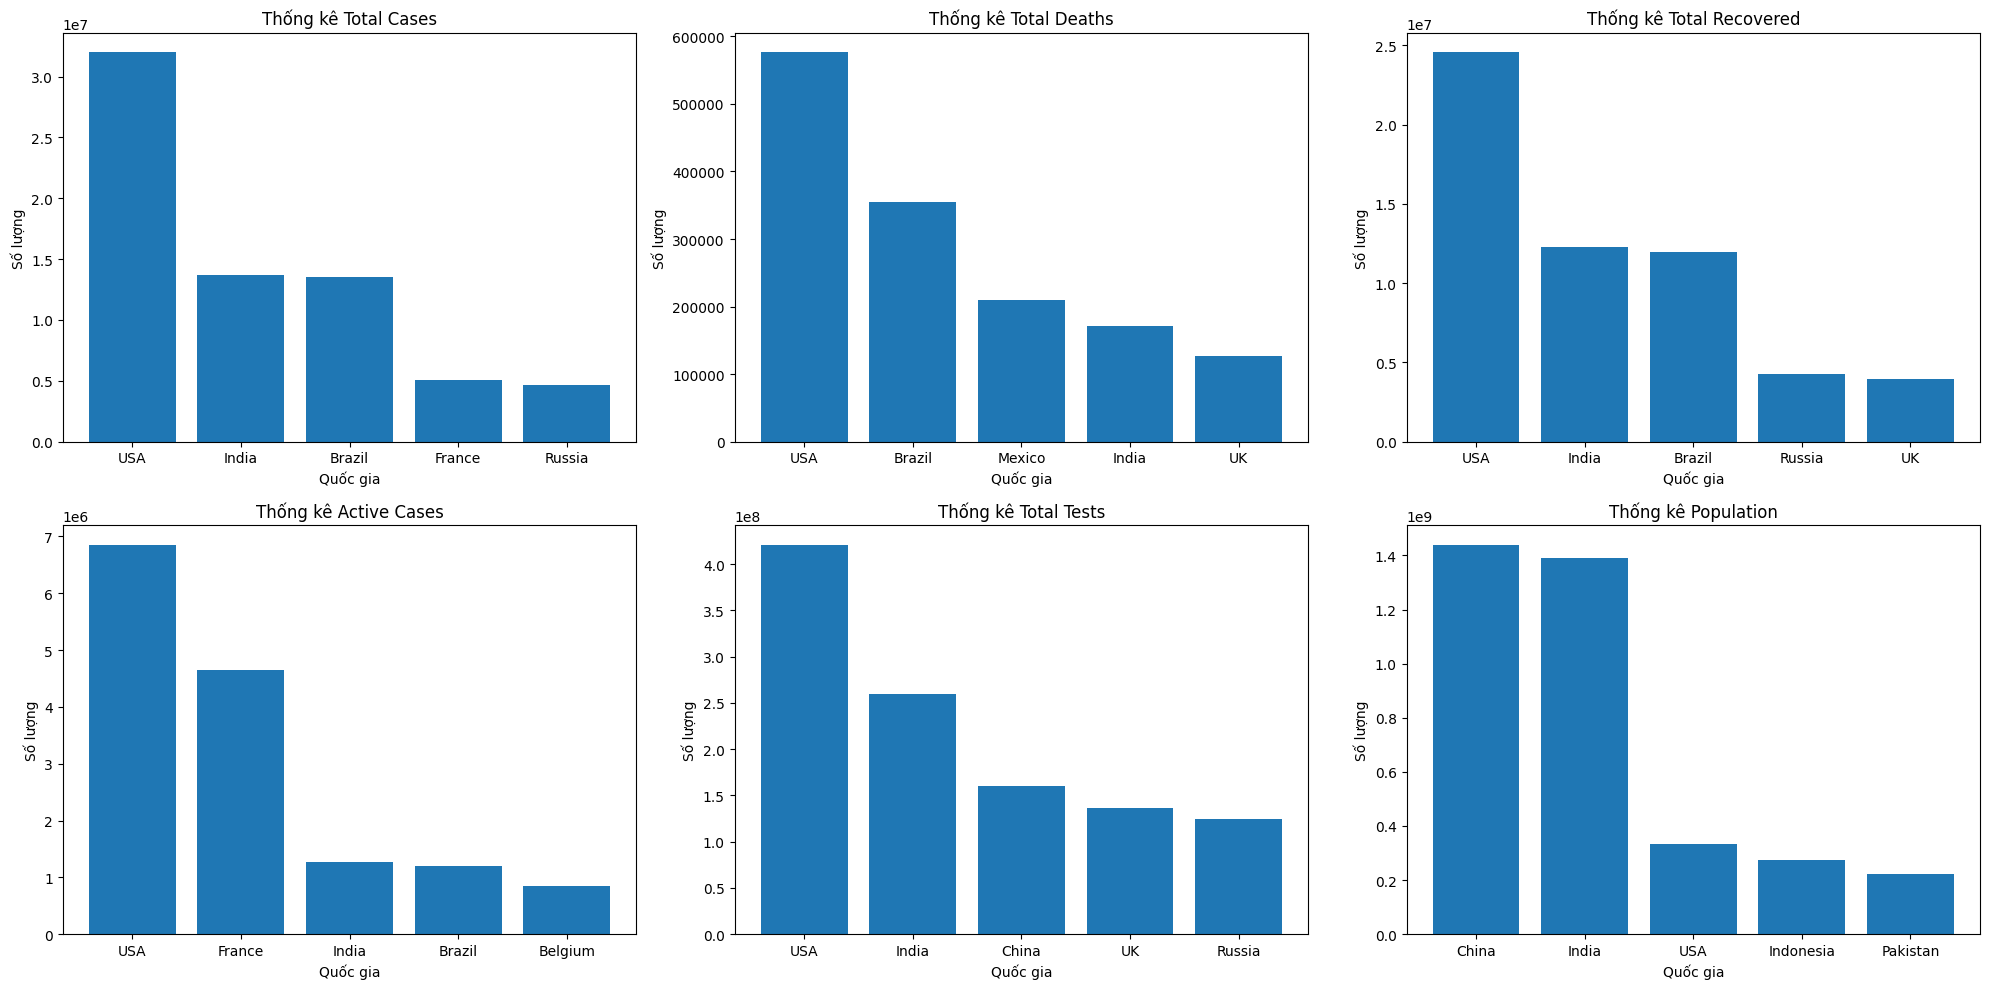

In [10]:
# TODO: draw 6 bar charts
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    countries = df.sort_values(col, ascending=False)['Country Name'].values[:5]
    values = df.sort_values(col, ascending=False)[col].values[:5]
    axes[i].bar(countries, values)
    axes[i].set_title(f'Thống kê {col}')
    axes[i].set_xlabel('Quốc gia')
    axes[i].set_ylabel('Số lượng')

plt.tight_layout()
plt.show()
#raise NotImplementedError('not implemented')

**TODO**: Comment about the chart

- **Total Cases:**
    - The top 5 countries with the highest total cases worldwide are the United States, India, Brazil, France, and Russia.
    - The United States leads with over 31 million cases, more than double the second-ranked India.
  
- **Total Deaths:**
    - The top 5 countries with the highest total deaths worldwide are the United States, Brazil, Mexico, India, and the United Kingdom.
    - The United States tops the list with over 576 thousand deaths, 1.7 times more than Brazil, the second-ranked country.
  
- **Total Recovered:**
    - The top 5 countries with the highest total recoveries worldwide are the United States, India, Brazil, Russia, and the United Kingdom.
    - The United States continues to lead with over 24.5 million recoveries, the highest globally.
    - India is second with over 12.2 million recoveries but still significantly lower than the United States.
  
- **Active Cases:**
    - The United States remains at the forefront with over 6.8 million active cases, the highest globally.
    - France, India, Brazil, and Belgium are other countries with significant active cases.
  
- **Total Tests:**
    - The top 5 countries with the highest total tests conducted worldwide are the United States, India, China, the United Kingdom, and Russia.
    - The United States leads with over 420 million tests, more than double that of India, the second-ranked country.

Based on the charts, we can make the following observations:

- The United States is experiencing the most severe impact of COVID-19 globally, leading in `Total Cases`, `Total Deaths`, `Active Cases`. However, it also leads in `Total Recovered`, `Total Tests`, indicating that the country has made significant efforts to control the pandemic.
  
- India, despite being the second-highest in `Total Cases`, `Total Recovered`, and `Total Tests`, has a low death rate, possibly due to effective control measures and lessons learned from the early stages of the pandemic.
  
- Brazil, France, and Russia are facing challenging situations with a large number of infections and deaths, reflecting a strong spread of the disease in Europe and the Americas, requiring robust measures to control and minimize the impact.
  
- China, despite having a high number of cases, exhibits a low death rate, possibly a result of effective control measures and lessons learned from the early stages of the pandemic.

### Requirement #3: Draw world map

- Using bar chart just gives you a little bit information about numbers
- In this requirement, you are going to draw a world map with circles which shows the number of cases for each country. Specifically, you are provided a file named `coord.csv` that contains longitude and latitude of each country. You are going to use `Total cases` and `Total Death` to draw the following charts

C:\Users\HP\AppData\Local\Temp\ipykernel_21692\1349027894.py:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


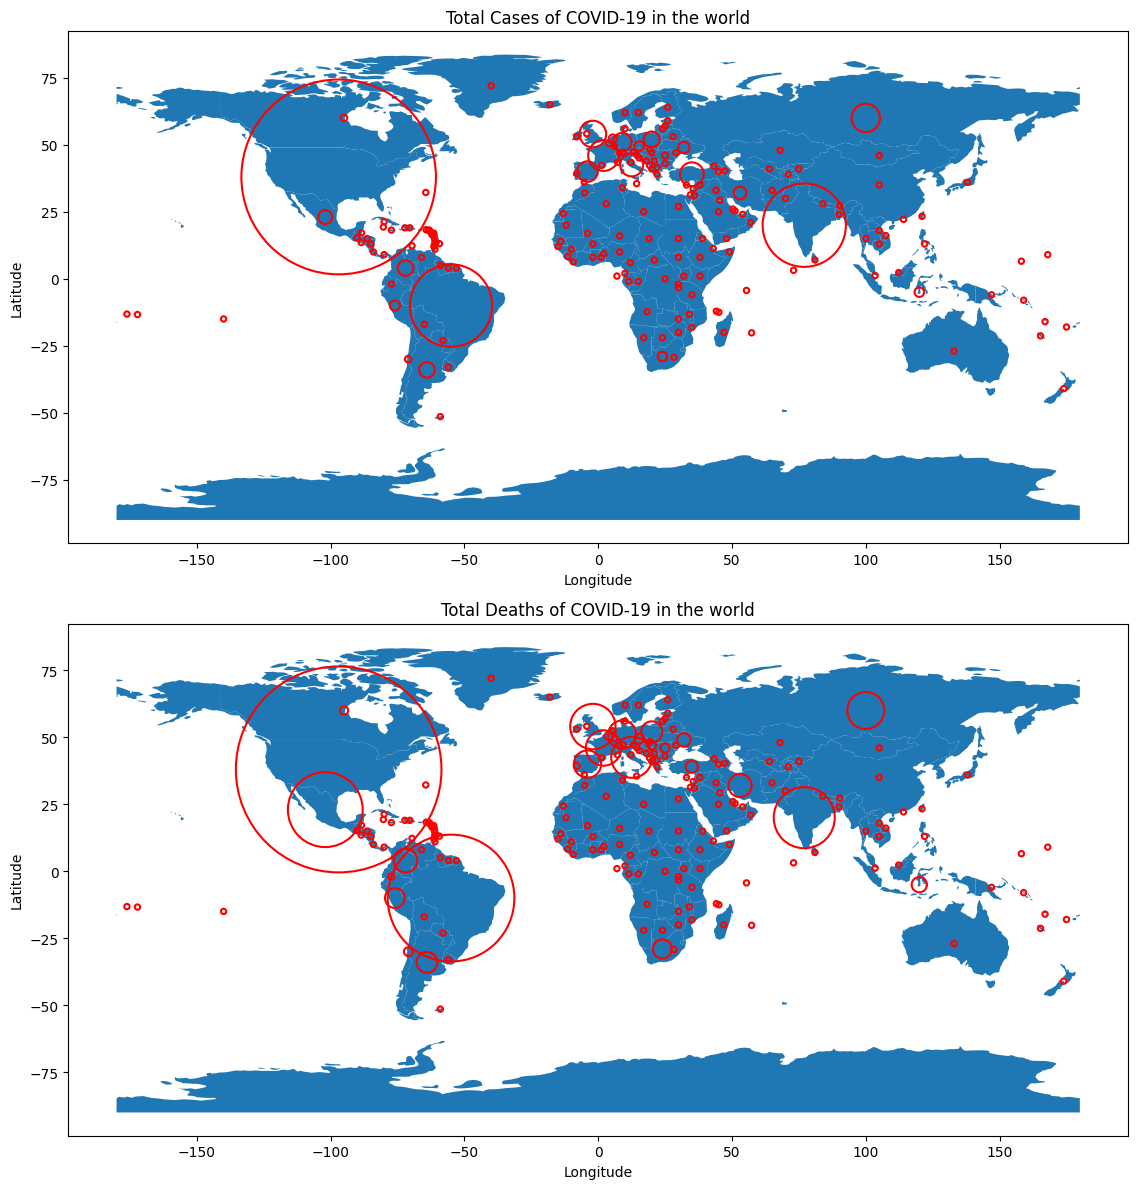

In [11]:
# TODO: draw 2 world map chart using geopandas
coordinates = json.load(open('./data/coord.json', 'r'))
def get_coordinate(country,coordinate):
    try:
        return coordinates[coordinate][country]
    except:
        return None
df['lat'] = df['Country Name'].apply(lambda x: get_coordinate(x,'lat'))
df['long'] = df['Country Name'].apply(lambda x: get_coordinate(x,'long'))
geo_df = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.long, df.lat))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
fig, axes = plt.subplots(2, 1, figsize=(20, 12))

world.plot(ax=axes[0])

for index in df.index:
    data = df.loc[index]
    axes[0].add_patch(plt.Circle((data['long'], data['lat']), radius=max(data['Total Cases']/880000,1), fc='None', ec='red', lw=1.5, alpha=1))
axes[0].set_title('Total Cases of COVID-19 in the world')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')

world.plot(ax=axes[1])
for index in df.index:
    data = df.loc[index]
    axes[1].add_patch(plt.Circle((data['long'], data['lat']), radius=max(data['Total Deaths']/15000,1), fc='None', ec='red', lw=1.5, alpha=1))
axes[1].set_title('Total Deaths of COVID-19 in the world')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
plt.tight_layout()
plt.show()


#raise NotImplementedError('not implemented')

**TODO**: Comment about the chart

Based on the chart, we can make the following observations:

- The regions of Europe, North America, South America, and India are currently experiencing a severe pandemic situation, with a high number of infections and deaths.

- Both Asia and Africa are also significantly affected by the pandemic, with nearly all countries in these regions reporting infections and deaths.

- The regions of Oceania and the Antarctic seem to be the least affected by the pandemic, with low numbers of infections and deaths.

- The United States and India stand out as the two countries facing the most severe pandemic situations, having the highest numbers of infections and deaths globally. Particularly, the United States has approximately twice the number of infections and deaths compared to India.

### Requirement #4: Relationship between 2 variables

- Exploring the relationship between variables is a needed task to do
- You will start with exploring the linear relationship between 2 variables. In order to do so, draw $C_6^2=15$ scatter plots. For each plot, draw a line that shows the linear relationship of variables. You should implement the line yourself instead of using library.

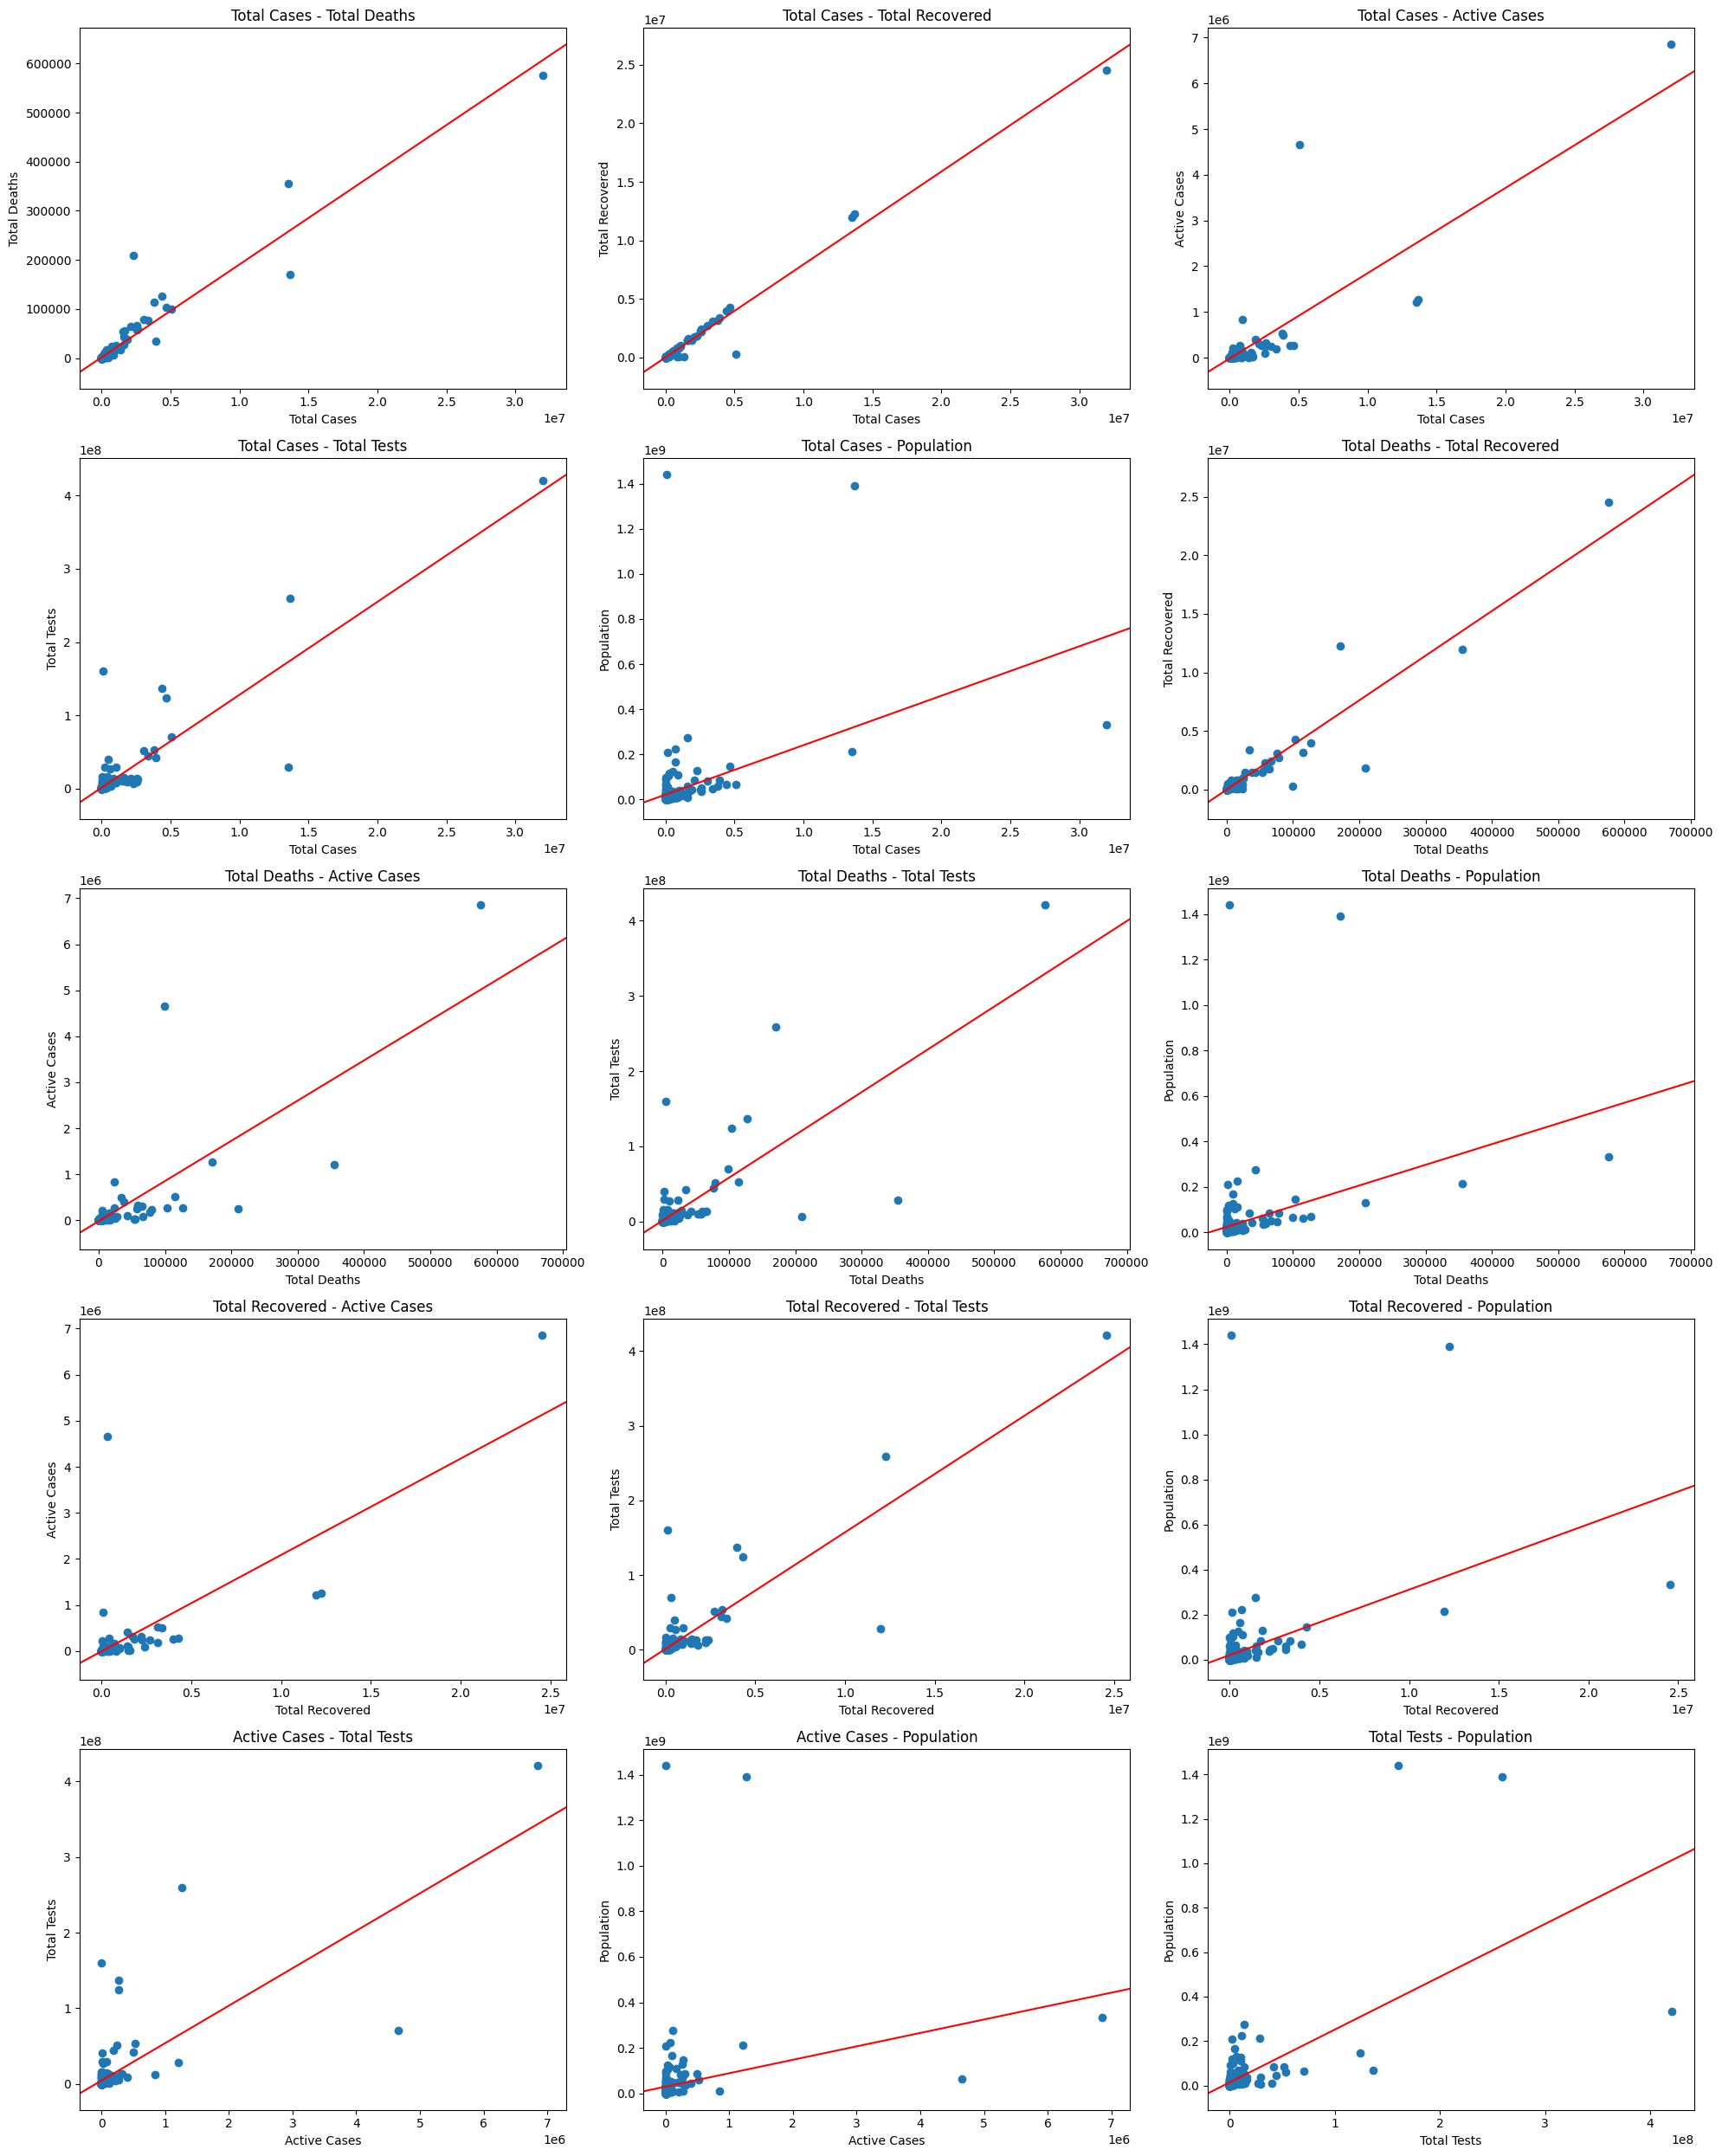

In [12]:
# TODO: scatter stuff
fig, axes = plt.subplots(5,3, figsize=(20, 25))
axes = axes.flatten()
# explore linear relationship between each pair of numeric columns
import itertools
for i, (col1, col2) in enumerate(itertools.combinations(numeric_columns, 2)):
    
    # plot the scatter plot
    axes[i].scatter(df[col1], df[col2])
    axes[i].set_title(f'{col1} - {col2}')
    axes[i].set_xlabel(col1)
    axes[i].set_ylabel(col2)
    axes[i].set_xlim(axes[i].get_xlim()[0], axes[i].get_xlim()[1] + 100000)
    # fit a linear regression line
    X = df[col1].values
    Y = df[col2].values
    X = np.concatenate([X.reshape(-1,1), np.ones((X.shape[0], 1))], axis=1)
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    # plot the linear regression line
    x = np.linspace(axes[i].get_xlim()[0], axes[i].get_xlim()[1], 500)
    y = theta[0] * x + theta[1]
    axes[i].plot(x, y, color='red')
plt.tight_layout()
plt.show()
#raise NotImplementedError('not implemented')

**TODO**: As showed above, give your prediction about the relationship between each pair.

- **Overall Overview:**

From the chart, it is evident that all the lines representing relationships have a positive slope, indicating a positive linear relationship (increase together) between variables. Moreover, not only through the lines but also by observing the distribution of data points on the scatter plot, a positive linear relationship between variables is apparent.

- **Strong Positive Linear Relationships:**

Particularly, there are several pairs of variables showing a strong positive linear relationship. This means that as the value of one variable increases, the value of the other variable also increases significantly. These pairs include:

    - Total Cases and Total Deaths
    - Total Cases and Total Recovered
    - Total Cases and Active Cases
    - Total Cases and Total Tests
    - Total Deaths and Total Recovered
    - Total Deaths and Active Cases
    - Total Deaths and Total Tests
    - Total Recovered and Active Cases
    - Total Recovered and Total Tests
    - Active Cases and Total Tests

- **Weak Positive Linear Relationships:**

On the other hand, there are other pairs of variables with a weak positive linear relationship, meaning that as the value of one variable increases, the value of the other variable also increases but not strongly. These pairs include:

    - Total Deaths and Critical Cases
    - Total Recovered and Critical Cases
    - Active Cases and Critical Cases
    - Population and Total Tests
    - Population and Total Cases
    - Population and Total Deaths
    - Population and Total Recovered
    - Population and Active Cases




### Requirement #5: Double check the relationship between 2 variables

- In order to make sure about the linear relationship, you have to check each pair with **Pearson correlation coefficient**
- Specifically, $\rho$ is calculated as follows:

$$\rho_{X, Y} = \frac{cov(X, Y)}{\sigma_X \sigma_Y}$$

- Then, plot these 15 values using heatmap

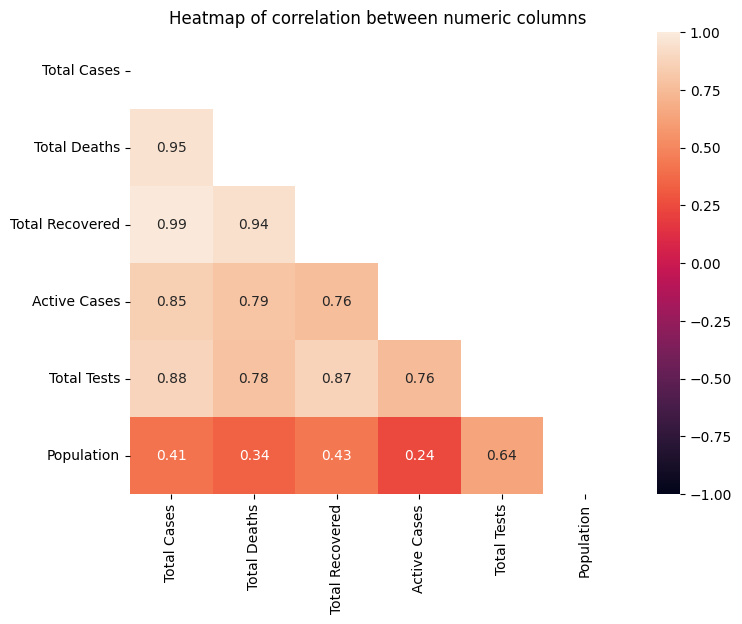

In [13]:
# TODO: create heatamp
corr = df[numeric_columns].corr()

# Mask for the lower triangle
mask = np.triu(np.ones_like(corr, dtype=bool))


plt.figure(figsize=(8, 6))
sn.heatmap(corr, vmax=1, vmin=-1, annot=True, mask=mask)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Heatmap of correlation between numeric columns')
plt.show()
#raise NotImplementedError('not implemented')

For now, you can check whether your prediction is right or wrong!

## Model visualization

- In this section, we are going to visualize the training and testing process of machine learning model
- The process of training and testing a model is as follow:
    1. Prepare data for training and testing
    2. Create a model
    3. Train and test the model
    4. Visualize the result

- You are required to:
    1. Study Multi-layer neural network and Convolutional neural network
    2. Study `Pytorch` in order to prepare data and design machine learning model
    3. Design 2 models to classify MNIST dataset. Then, visualize the result of each model and compare the result to each other
        - Model 1: A fully-connected model with 4 layers. The input layer has $784$ neurons. The hidden layer #1 has $1024$ neurons, which is followed by a $ReLU$ as activation functions. The hidden layer #2 has $512$ neurons, also followed by a $ReLU$ as activation functions. The output layer has $10$ neurons (of course), which follows by a $LogSoftmax$ function
        - Model 2: A CNN model with 2 Convolution layers and 1 linear layer. All the CNN layers have 20 filters, kernel size equal to $5$. Each of them is followed by a $ReLU$ activation function and a MaxPooling2D layer ($kernel\_size=2$). The linear layer is followed by a $LogSoftmax$ activation function

- Google Colab can be used since it provides free GPU, which makes your training and testing process faster

### Requirement #6: Prepare data

- `Pytorch` supports a lot of datasets for running machine learning model. In this lab, we use MNIST dataset. So, download the training set and the testing set using `Pytorch` and store them in `./data`
- Note that you have to transform your data into `tensor` (a datatype that's quite similar to `numpy array`) so you can input to model
- After that, create `train_dataloader` and `test_dataloader`

**TODO**: Explain why we have to create dataloader

Creating a dataloader is essential when using PyTorch for several reasons:

- Efficient Data Loading: A dataloader efficiently loads data from a dataset into batches, which is crucial for training and evaluating machine learning models. Batch processing significantly reduces the overhead of loading data and enables the model to process multiple samples simultaneously, improving training efficiency.

- Data Shuffling: Dataloaders can shuffle the data before each epoch, ensuring that the model is exposed to a diverse range of data samples during training. This shuffling helps prevent the model from overfitting to specific data patterns and promotes generalization to unseen data.

- Data Transformation: Dataloaders can apply transformations to the data, such as normalizing pixel values, cropping images, or converting text to numerical representations. These transformations ensure that the data is in a suitable format for the model to process and improve model performance.

- Customizable Data Loading: Dataloaders provide flexibility in customizing the data loading process. You can define custom samplers to control the order in which data is loaded or implement custom collater functions to combine batches of data in a specific way.

- Reduced Memory Usage: Dataloaders can effectively manage memory usage by loading data in batches instead of loading the entire dataset into memory at once. This is particularly important for large datasets that may not fit into available memory.

In [14]:
# TODO: download training, testing data and store them into training_data and testing_data
# Then, create train_dataloader and test_dataloader with batch_size=32
training_data = datasets.MNIST(
    root = './data',
    train= True,
    download= True,
    transform= ToTensor()
)

testing_data = datasets.MNIST(
    root = './data',
    train= False,
    download= True,
    transform= ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(testing_data, batch_size=32, shuffle=False)
#raise NotImplementedError('not implemented')

- After downloading the data, visualize 10 random samples (2 rows, 5 samples for each row) from training set.

KeyboardInterrupt: 

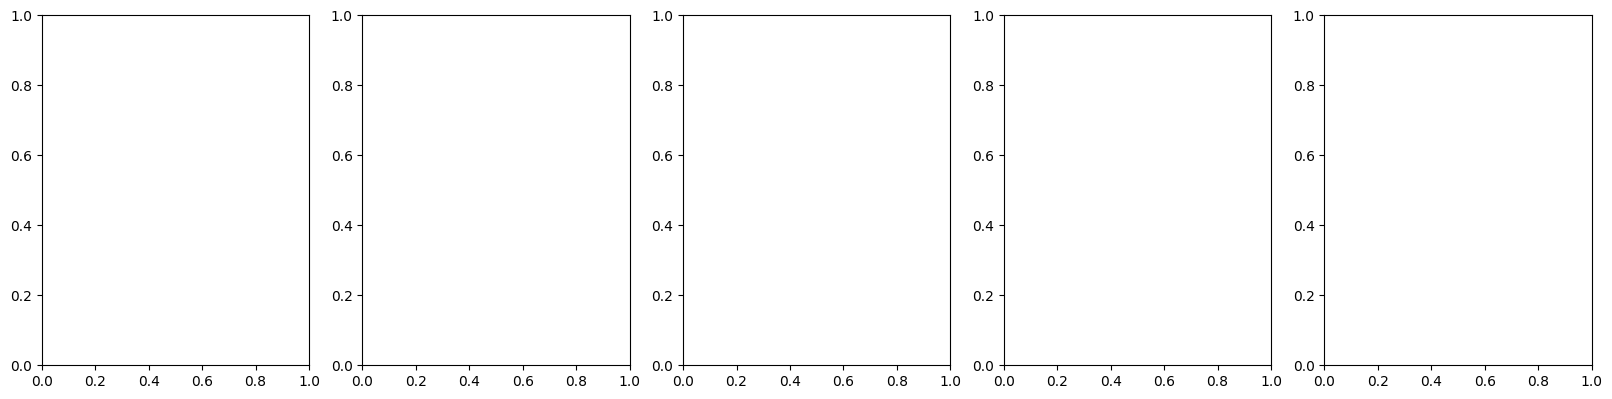

In [15]:
# TODO: visualize 10 random samples
#raise NotImplementedError('not implemented')
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()
for i in range(10):
    index = random.randint(0, len(training_data))
    axes[i].imshow(training_data[index][0].squeeze())
    axes[i].set_xlabel(f'{training_data[index][1]}')

plt.show()

### Requirement #7: Create models

- Create 2 models as mentioned above. Call them `Mnist_FC` and `Mnist_CNN`
- **I strongly recommend that you should slowly implement, print out the output and its shape of each layer in order to get a deep understanding of what you are trying to do**
- Before moving to the next requirement, you should test your model with a random sample of the dataset. In case you create code cells for testing, remember to remove these cells

In [ ]:
# TODO: create Mnist_FC and Mnist_CNN

class Mnist_FC(nn.Module):
    def __init__(self):
        super(Mnist_FC, self).__init__()
        self.sequential = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.LogSoftmax(dim=1)
        )
    def forward(self, x):
        x = self.sequential(x)
        return x
class Mnist_CNN(nn.Module):
    def __init__(self):
        super(Mnist_CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, kernel_size=5)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(20, 20, kernel_size=5)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(320, 10)
        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.relu1(self.conv1(x))
        x = self.maxpool1(x)
        x = self.relu2(self.conv2(x))
        x = self.maxpool2(x)
        x = self.flatten(x)
        x = self.fc(x)
        x = self.log_softmax(x)
        return x

model_fc = Mnist_FC()
model_cnn = Mnist_CNN()
print("Mnist_FC Model:\n", model_fc)
print("\nMnist_CNN Model:\n", model_cnn)

# test model with random sample of data to see if it works
for data, label in train_dataloader:
    print('Input shape: ', data.shape)
    print('Label shape: ', label.shape)
    print('Output shape: ', model_fc(data).shape)
    print('Output shape: ', model_cnn(data).shape)
    break

#raise NotImplementedError('not implemented')

Mnist_FC Model:
 Mnist_FC(
  (sequential): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=1024, bias=True)
    (2): ReLU()
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): ReLU()
    (5): Linear(in_features=512, out_features=10, bias=True)
    (6): LogSoftmax(dim=1)
  )
)

Mnist_CNN Model:
 Mnist_CNN(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(20, 20, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Linear(in_features=320, out_features=10, bias=True)
  (log_softmax): LogSoftmax(dim=1)
)
Input shape:  torch.Size([32, 1, 28, 28])
Label shape:  torch.Size([32])
Output shape:  torch.Size([32, 10])
Output shape:  torch.Size([32, 10]

### Requirement #8: Train and test models

- Design `train` and `test` function with the parameters provided in the following code cell
    - `train` function trains the model with all the data in training set
    - `test` function tests the model with all data in testing set

- Return the accuracy (e.g. $0.847351$) after training and testing

**TODO**: Explain the parameters of `train` and `test` function. In `test` function, there is a line of code that says `with torch.no_grad()`. Why do we have this line of code?

- **Parameters of `train` function:**

    - `model`: The neural network model being trained (`model_fc` or `model_cnn`)
    - `train_dataloader`: The dataloader object that provides batches of training data.
    - `loss_fn`: The loss function used to evaluate the model's performance on each batch of data.
    - `optimizer`: The optimizer algorithm used to update the model's parameters based on the loss function's output.
- **Parameters of `test` function:**

    - `model`: The neural network model being tested (`model_fc` or `model_cnn`)
    - `dataloader`: The dataloader object that provides batches of test data.

- Purpose of `with torch.no_grad()` Statement

    - The `with torch.no_grad()` statement in the `test` function ensures that the model's parameters are not updated during the evaluation process. This is because we only want to evaluate the model's performance on the test data, not modify its parameters.

    - By disabling gradient calculation, we save computational resources and prevent the model's parameters from being affected by the test data. This helps ensure that the evaluation results are a true reflection of the model's ability to generalize to unseen data

In [ ]:
# TODO: design train and test function

# check gpu
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Using {device} for training and testing')
def train(dataloader, model, loss_fn, optimizer):
    model.train()  
    total_loss = 0.0
    correct_predictions = 0

    for inputs, labels in dataloader:
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass
        loss = loss_fn(outputs, labels)  # Compute the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update the weights

        total_loss += loss.item() * len(labels)
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()

    accuracy = correct_predictions / len(dataloader.dataset)
    average_loss = total_loss / len(dataloader.dataset)
    
    return accuracy, average_loss

def test(dataloader, model):
    model.eval()  
    correct_predictions = 0

    with torch.no_grad():  # No need to compute gradients during testing
        for inputs, labels in dataloader:
            outputs = model(inputs)  # Forward pass
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()

    accuracy = correct_predictions / len(dataloader.dataset)
    
    return accuracy

#raise NotImplementedError('not implemented')

Using cpu for training and testing


- Run 20 epochs for each model. In order to do so, at fist, you have to define `learning_rate, loss_fn` and `optimizer`. I will help you on that

- Save the history of training and testing process as `history_fc` and `history_cnn`. During the running process, you should print out the accuracy in order to keep track

- The history is a dictionary with the following structure:

```python
history = {
    1: [0.6, 0.5], # the key (type: int) is the epoch
    2: [0.7, 0.6], # the value (type: list) contains the accuracy of training and testing process at the corresponding epoch
    ...
}
```

**TODO**: List out some loss functions and optimizers that you have heard about

- **Loss Functions**

    - **Mean Squared Error (MSE)**: MSE is a widely used loss function for regression tasks. It measures the average squared difference between the predicted and true values.

    - **Mean Absolute Error (MAE)**: MAE is another loss function for regression tasks. It measures the average absolute difference between the predicted and true values.

    - **Binary Cross-Entropy Loss**: Binary cross-entropy loss is a specialized version of cross-entropy loss for binary classification tasks. It is used when there are only two - possible outcomes, such as predicting whether an image is a cat or a dog.


- **Optimizers**

    - **Stochastic Gradient Descent (SGD)**: SGD is a fundamental optimization algorithm that updates model parameters based on the gradient of the loss function.

    - **Momentum**: Momentum is an extension of SGD that adds a velocity term to the parameter updates. This helps the optimizer move in a more consistent direction and avoid getting stuck in local minima.


In [ ]:
# TODO: run 20 epochs for Mnist_FC and Mnist_CNN
learning_rate = 1e-3
loss_fn = nn.CrossEntropyLoss()

history_fc = {}
history_cnn = {}

for model in [model_fc, model_cnn]:
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    print(f'========== {model.__class__.__name__} model ==========')
    for epoch in range(20):
        print(f'Epoch {epoch + 1}')
        print('--------------------------')
        train_accuracy, train_loss = train(train_dataloader, model, loss_fn, optimizer)
        test_accuracy = test(test_dataloader, model)
        print(f'Training acc: {train_accuracy:.3f}')
        print(f'Testing acc: {test_accuracy:.3f}')
        if model.__class__.__name__ == 'Mnist_FC':
            history_fc[epoch] = [train_accuracy, test_accuracy]
        else:
            history_cnn[epoch] = [train_accuracy, test_accuracy]
        print()

#raise NotImplementedError('not implemented')

========== Mnist_FC model ==========
Epoch 1
--------------------------


Training acc: 0.398
Testing acc: 0.532

Epoch 2
--------------------------
Training acc: 0.624
Testing acc: 0.704

Epoch 3
--------------------------
Training acc: 0.736
Testing acc: 0.783

Epoch 4
--------------------------
Training acc: 0.799
Testing acc: 0.823

Epoch 5
--------------------------
Training acc: 0.833
Testing acc: 0.849

Epoch 6
--------------------------
Training acc: 0.853
Testing acc: 0.867

Epoch 7
--------------------------
Training acc: 0.867
Testing acc: 0.879

Epoch 8
--------------------------
Training acc: 0.877
Testing acc: 0.887

Epoch 9
--------------------------
Training acc: 0.885
Testing acc: 0.892

Epoch 10
--------------------------
Training acc: 0.890
Testing acc: 0.895

Epoch 11
--------------------------
Training acc: 0.893
Testing acc: 0.899

Epoch 12
--------------------------
Training acc: 0.897
Testing acc: 0.902

Epoch 13
--------------------------
Training acc: 0.900
Testing acc: 0.905

Epoch 14
--------------------------
Training acc: 0.902


### Requirement #9: Visualize

- Produce a graph as the following code cell and comment about the running process of 2 models

**TODO**: Your comment

- General Observations:

    - Both models initially had low accuracy on both training and testing sets, gradually improving as training progressed.
    - The accuracy for both models increased rapidly in the early epochs, followed by a slower and more stable increase from the 10th epoch onward.
    - The testing accuracy for both models consistently exceeded the training accuracy.
    - Initially, both models exhibited some accuracy discrepancy between the training and testing sets, but as epochs increased, this difference reduced, with both training and testing accuracies nearly converging in the final epochs.

- Comparison between FC and CNN Models:

    - **Accuracy**: the CNN Model consistently outperformed the FC Model in both training and testing accuracy. This is evident in the final epoch, where the FC Model had training and testing accuracies of 0.91 and 0.92, respectively, while the CNN Model had accuracies of 0.96 and 0.96.
    - **Learning Speed**: As epochs increased, the CNN model demonstrated a faster increase in accuracy compared to the FC model. Evidence of this is seen at epoch 5, where the FC model had training and testing accuracies of 0.83 and 0.85, respectively, while the CNN model had accuracies of 0.91 and 0.92.
    - **Model Improvement**: The CNN model exhibited significant improvement in accuracy throughout training, reaching (0.96, 0.96) from an initial accuracy of (0.4, 0.65). In comparison, the FC model improved from (0.45, 0.66) to (0.91, 0.92).

- Conclusion:

    - In the task of image classification, the CNN model proves to be a superior choice, displaying higher accuracy and faster learning compared to the FC model.
    - While the FC model showed considerable improvement and might be considered for other tasks, within this context, the CNN model consistently delivered better results.
    - Both models demonstrated stable accuracy without signs of overfitting, indicating good generalization to new data.

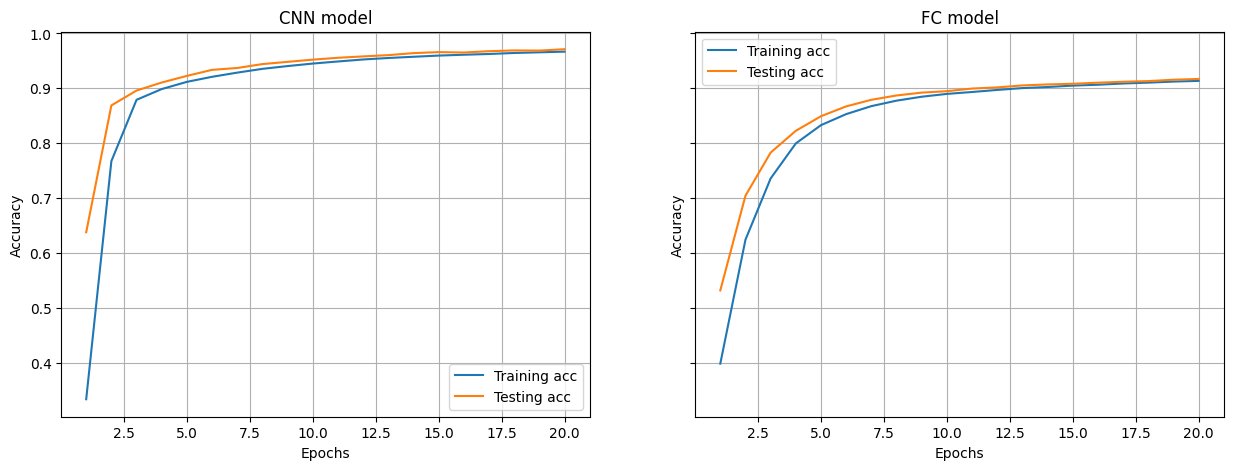

In [ ]:
# TODO: visualize the history
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True, gridspec_kw={'hspace': 0.5})

epoch_values = [int(key) + 1 for key in history_cnn.keys()]

axes[0].plot(epoch_values, [history_cnn[key][0] for key in history_cnn.keys()], label='Training acc')
axes[0].plot(epoch_values, [history_cnn[key][1] for key in history_cnn.keys()], label='Testing acc')
axes[0].set_title('CNN model')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epoch_values, [history_fc[key][0] for key in history_fc.keys()], label='Training acc')
axes[1].plot(epoch_values, [history_fc[key][1] for key in history_fc.keys()], label='Testing acc')
axes[1].set_title('FC model')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

# Set a common grid for both subplots
for ax in axes:
    ax.grid()
    ax.set_xlim(0.01,21)
plt.show()


#raise NotImplementedError('not implemented')

- Highly recommend you go play around with the parameters of models and re-implement 2 models using `TensorFlow` using Colab